In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# theme
sns.set_theme(style="darkgrid")

# Loading the Data

In [3]:
insurance_df = (pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")
                  .drop(columns=["Unnamed: 0", "Customer"])
)

In [4]:
insurance_df.columns = [column.lower().replace(" ","_") for column in insurance_df.columns]

# Showing the Data

In [5]:
insurance_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Activity 5

## Show a plot of the total number of responses.

### Option 1 - sns.barplot

In [6]:
# we create a df contaning the count of yes of no

response = insurance_df["response"].value_counts()
response

No     8813
Yes    1466
Name: response, dtype: int64

<AxesSubplot:title={'center':'Response Rate'}, ylabel='response'>

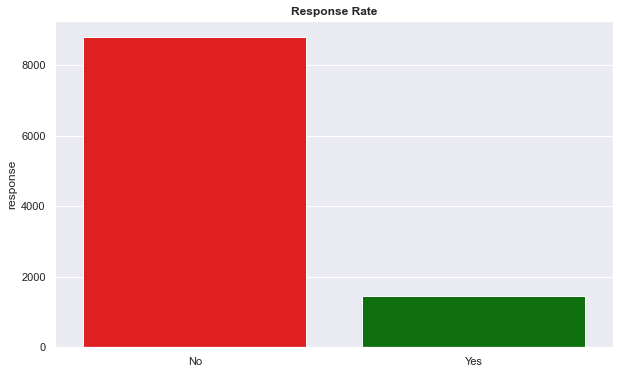

In [82]:
# we create the figure (canvas)

fig1 = plt.figure(figsize=(10,6))

# we set the tittle
plt.title("Response Rate", fontweight="bold")

# we plot in our figure, this is creating axes object behind the curtains
sns.barplot(x=response.index, y=response, palette=["red", "green"])



### Option 2 - sns.countplot

In [26]:
# we can use countplot the grouping and counting is done behind the curtains

<AxesSubplot:title={'center':'Response Rate'}, xlabel='response', ylabel='count'>

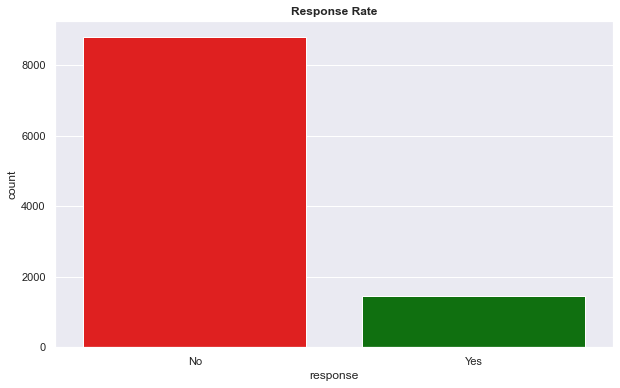

In [83]:
# we create the figure (canvas)

fig2 = plt.figure(figsize=(10,6))

# we set the tittle
plt.title("Response Rate", fontweight="bold")

# we plot in our figure, this is creating axes object behind the curtains
sns.countplot(data=insurance_df, x="response", palette=("red", "green"))


##  Show a plot of the response rate by the sales channel.

### Option 1 - sns.barplot

In [20]:
# we need a groupby first

response_by_channel = (insurance_df.groupby(["sales_channel", "response"])["income"]
                                   .count()
                                   .rename("count")
                                   .reset_index()
                      )   
response_by_channel

,sales_channel,response,count
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


<AxesSubplot:title={'center':'Response Rate VS Channel'}, xlabel='sales_channel', ylabel='count'>

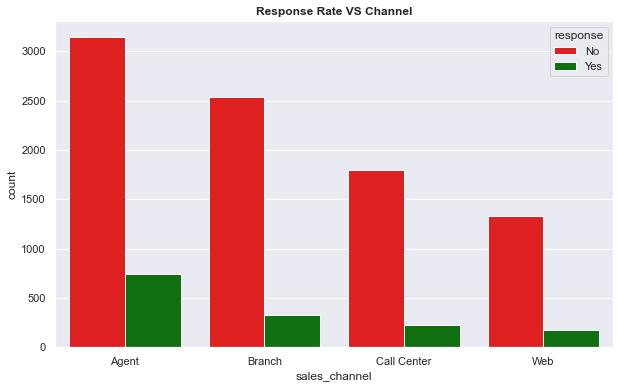

In [79]:
# we create the figure (canvas)

fig3 = plt.figure(figsize=(10,6))

# we set the tittle
plt.title("Response Rate VS Channel", fontweight="bold")

# we plot in our figure, this is creating axes object behind the curtains
sns.barplot(data=response_by_channel, x="sales_channel", y="count", hue="response", palette=["red", "green"])

### Option 2 - sns.countplot

In [25]:
# we can use countplot the grouping and counting is done behind the curtains

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

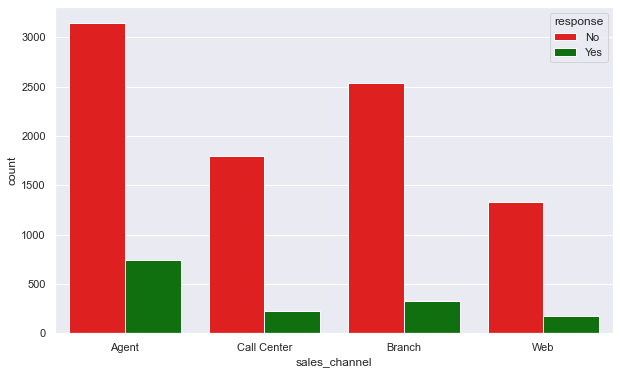

In [28]:
# we create the figure (canvas)

fig4 = plt.figure(figsize=(10,6))

# we plot in our figure, this is creating axes object behind the curtains
sns.countplot(data=insurance_df, x="sales_channel", hue="response", palette=("red", "green"))


## Show a plot of the response rate by the total claim amount.

### Option 1 - boxplot (because total claim amount is a continious var)

<AxesSubplot:title={'center':'Response Rate VS Total Claim Amount'}, xlabel='response', ylabel='total_claim_amount'>

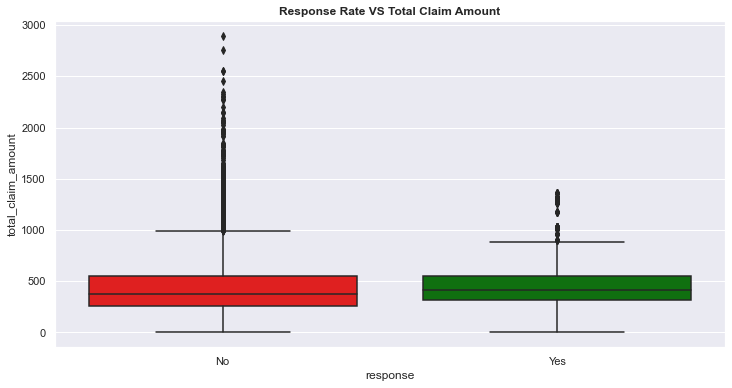

In [78]:
# we create the figure (canvas)

fig5 = plt.figure(figsize=(12,6))

# we set the tittle
plt.title("Response Rate VS Total Claim Amount", fontweight="bold")

# we plot in our figure, this is creating axes object behind the curtains
sns.boxplot(data=insurance_df, x="response", y="total_claim_amount", palette=("red", "green"))


### Option 2 - binning the variable (because total claim amount is a continious var)

In [61]:
# we can the total claim amounts

bins_labels = ["Very Low", "Low", "Medium", "High"]
insurance_df["total_claim_amount_binned"] = pd.cut(insurance_df["total_claim_amount"], bins=4, labels=bins_labels)
insurance_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,total_claim_amount_binned
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Very Low
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Low
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Very Low
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Very Low
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Very Low


In [62]:
insurance_df["total_claim_amount_binned"].value_counts()

Very Low    9580
Low         1232
Medium        86
High          12
Name: total_claim_amount_binned, dtype: int64

<AxesSubplot:title={'center':'Response Rate VS Total Claim Amount'}, xlabel='total_claim_amount_binned', ylabel='count'>

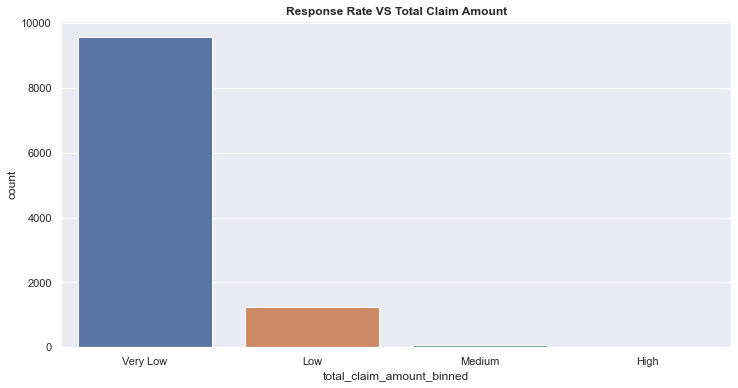

In [77]:
# we create the figure (canvas)

fig6 = plt.figure(figsize=(12,6))

plt.title("Response Rate VS Total Claim Amount", fontweight="bold")

# we plot in our figure, this is creating axes object behind the curtains
sns.countplot(data=insurance_df, x="total_claim_amount_binned")


## Correlation Heatmap

In [86]:
# we calculate the correlation matrix

correlation_matrix = insurance_df.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap'}>

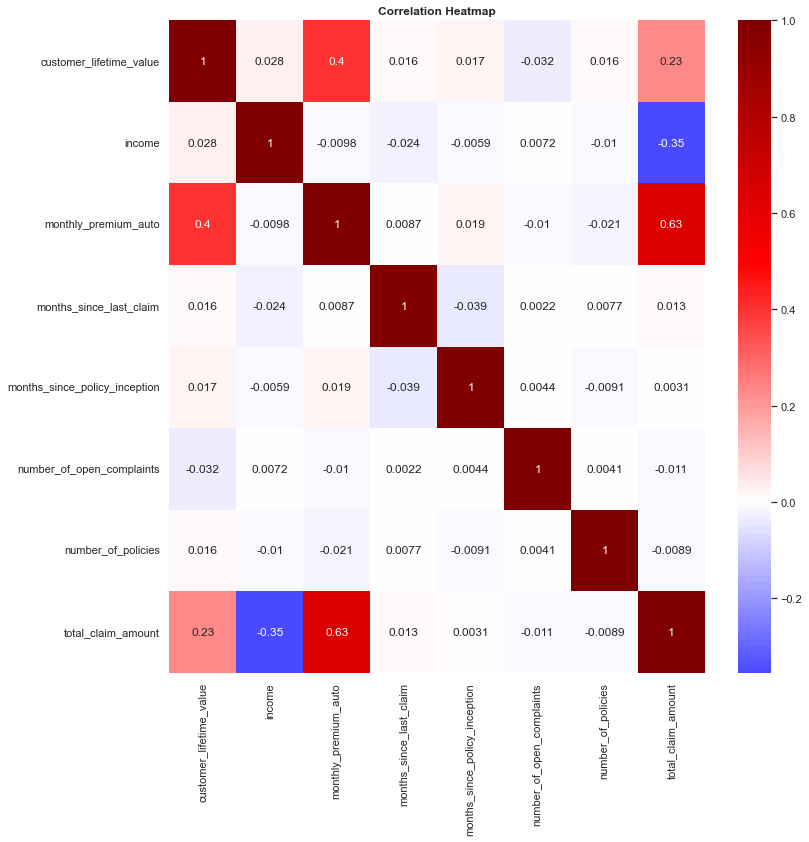

In [88]:
# create figure and axes
fig7 = plt.subplots(figsize = (12,12))

# set title
plt.title('Correlation Heatmap', fontweight='bold')



sns.heatmap(correlation_matrix,  # the data for the heatmap
                          annot=True,  # show the actual values of correlation
                          cmap='seismic',  # provide the 'seismic' colormap
                          center=0,  # specify the value at which to center the colormap
                          )

## Other Plots

<AxesSubplot:title={'center':'Regression Plot - Monthly Premium Auto VS Total Claim Amount'}, xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

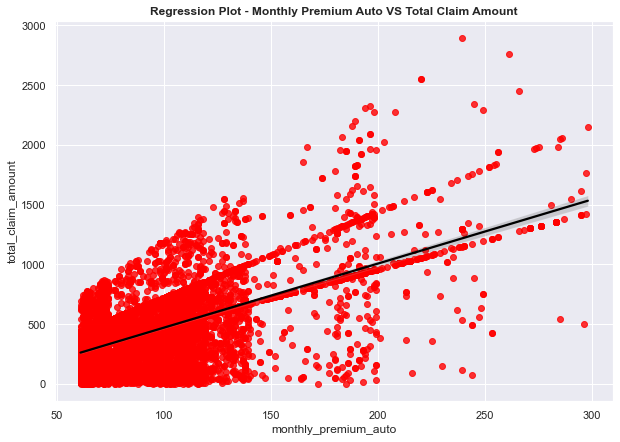

In [93]:
# regression plot

fig8 = plt.figure(figsize=(10,7))

plt.title("Regression Plot - Monthly Premium Auto VS Total Claim Amount", fontweight="bold")

sns.regplot(data=insurance_df, x="monthly_premium_auto", y="total_claim_amount", scatter_kws={"color": "red"}, line_kws={"color": "black"})

